In [62]:
# imports 
import pandas as pd
from collections import defaultdict
import geopandas
%matplotlib inline

In [137]:
# Read the CSV file
df = pd.read_csv('firearms.csv')
df = df.dropna()
# filter data
# num_seize = df.groupby("neighborhood").sum()['total_count'].reset_index()
# num_seize.sort_values(by="total_count", ascending=False)
num_seize = df.groupby("neighborhood").sum()['total_count']
num_seize.sort_values(ascending=False)

neighborhood
Homewood South      343
South Side Flats    208
Homewood North      159
Brighton Heights    149
East Liberty        148
                   ... 
Mt. Oliver            4
Oakwood               4
Regent Square         4
Summer Hill           3
Swisshelm Park        3
Name: total_count, Length: 88, dtype: int64

In [121]:
# dictionary: dict[neighborhood] = total_count
#num_seize_dict = num_seize.set_index('neighborhood')['total_count'].to_dict()

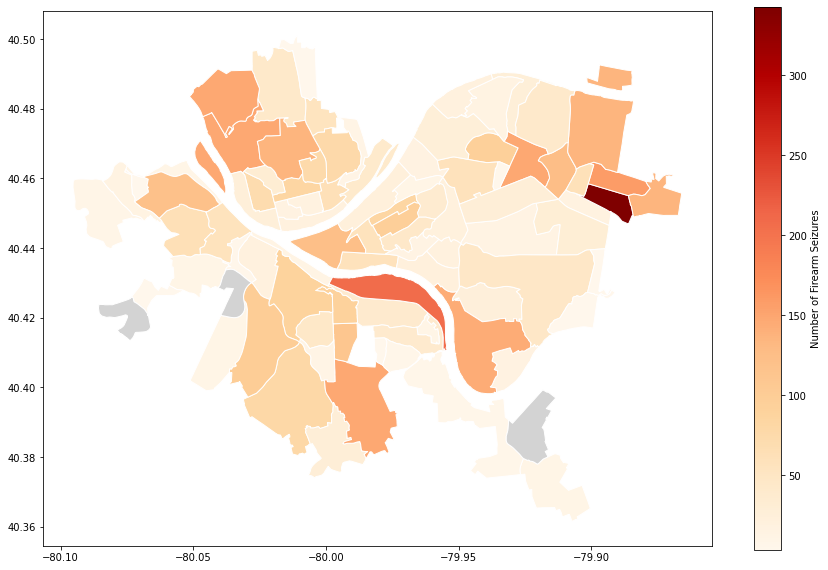

In [136]:
# plot map
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

# do the merge
seize_map = neighborhoods.merge(num_seize, how='left', left_on="hood", right_on='neighborhood')

# look at the head to confirm it merged correctly
seize_map[['hood','total_count','geometry']].head()

seize_map.plot(column='total_count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Firearm Seizures"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )